In [519]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import r2_score

In [520]:
image_dir = Path('./images500-20221123T124124Z-001/images500')

In [521]:
image_dir

Path('images500-20221123T124124Z-001/images500')

In [522]:
filepath = pd.Series(list(image_dir.glob(r'**/*')), name = 'Filepath').astype(str)

In [523]:
filepath[0]

'images500-20221123T124124Z-001\\images500\\id_0002ea6f15c7fa6f4c221783.jpg'

In [524]:
os.path.split(filepath.values[0])[1]

'id_0002ea6f15c7fa6f4c221783.jpg'

In [525]:
image = pd.Series(filepath.apply(lambda x :os.path.split(os.path.split(x)[1])[1]), name = 'image_id_worm')

In [526]:
images = pd.concat([filepath, image],axis = 1).sample(frac = 1.0,random_state = 42).reset_index(drop = True)

In [527]:
images.sample(5)

,Filepath,image_id_worm
7836,images500-20221123T124124Z-001\images500\id_e020a7395bc6af7b96e7ca6b.jpg,id_e020a7395bc6af7b96e7ca6b.jpg
2584,images500-20221123T124124Z-001\images500\id_c04d85b8d9e4aa4befde3519.jpg,id_c04d85b8d9e4aa4befde3519.jpg
6388,images500-20221123T124124Z-001\images500\id_3c549fa3babb085f600a3354.jpg,id_3c549fa3babb085f600a3354.jpg
6081,images500-20221123T124124Z-001\images500\id_e346e16e0937f839965928ff.jpg,id_e346e16e0937f839965928ff.jpg
3377,images500-20221123T124124Z-001\images500\id_646c6c25241561069b20f950.jpg,id_646c6c25241561069b20f950.jpg


In [528]:
images.shape

(12540, 2)

In [529]:
import cv2
import numpy as np
import random

In [530]:
# cv2.imread(filepath[2])

In [531]:
# for i in range(len(filepath)):
#     # read image
#     img = cv2.imread(filepath[i])

#     # blur
#     blur = cv2.GaussianBlur(img, (5,5), 0)

#     # convert to hsv and get saturation channel
#     sat = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)[:,:,1]

#     # threshold saturation channel
#     thresh = cv2.threshold(sat, 10, 255, cv2.THRESH_BINARY)[1]

#     # apply morphology close and open to make mask
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
#     morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)
#     mask = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=1)

#     # do OTSU threshold to get circuit image
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

#     # write black to otsu image where mask is black
#     otsu_result = otsu.copy()
#     otsu_result[mask==0] = 0

#     # write black to input image where mask is black
#     img_result = img.copy()
#     img_result[mask==0] = 0
    
#     cv2.imwrite(filepath[i], img_result)

# #     # write result to disk
# #     cv2.imwrite("circuit_board_mask.png", mask)
# #     cv2.imwrite("circuit_board_otsu.png", otsu)
# #     cv2.imwrite("circuit_board_otsu_result.png", otsu_result)
# #     cv2.imwrite("circuit_board_img_result.png", img_result)


#     # # display it
#     # cv2.imshow("IMAGE", img)
#     # cv2.imshow("SAT", sat)
#     # cv2.imshow("MASK", mask)
#     # cv2.imshow("OTSU", otsu)
#     # cv2.imshow("OTSU_RESULT", otsu_result)
#     # cv2.imshow("IMAGE_RESULT", img_result)
#     # cv2.waitKey(0)

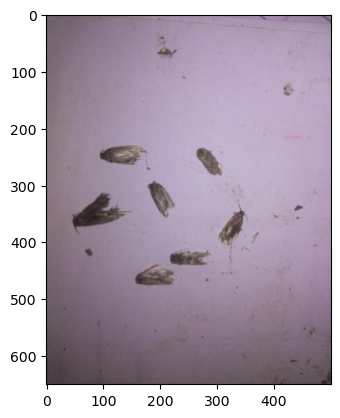

In [532]:
x = plt.imread(filepath[9])
plt.imshow(x)

In [533]:
train = pd.read_csv('Train.csv')

In [534]:
train = train.fillna(0)

In [535]:
train.head()

,image_id_worm,worm_type,number_of_worms
0,id_0002ea6f15c7fa6f4c221783.jpg,pbw,51
1,id_0005ef295aafe6acc63587db.jpg,pbw,8
2,id_00084298dd030a500033ff78.jpg,0,0
3,id_00093f2c76f6488737325859.jpg,pbw,12
4,id_000b2e6c437c643f25d4a6c3.jpg,pbw,87


In [536]:
train[train['image_id_worm'] == 'id_0a874b32c61041f70b309f6e.jpg']

,image_id_worm,worm_type,number_of_worms
412,id_0a874b32c61041f70b309f6e.jpg,0,0


In [537]:
train.describe()

,number_of_worms
count,9900.000000
mean,13.835859
std,35.314402
min,0.000000
25%,0.000000
50%,3.000000
75%,10.000000
max,527.000000


In [538]:
train.shape

(9900, 3)

In [539]:
train.isna().sum()

image_id_worm      0
worm_type          0
number_of_worms    0
dtype: int64

In [540]:
train_pivot = train.pivot_table(values = 'number_of_worms', index = 'image_id_worm', columns = 'worm_type').reset_index()

In [541]:
train_pivot.head()

worm_type,image_id_worm,0,abw,pbw
0,id_0002ea6f15c7fa6f4c221783.jpg,NaN,NaN,51.0
1,id_0005ef295aafe6acc63587db.jpg,NaN,NaN,8.0
2,id_00084298dd030a500033ff78.jpg,0.0,NaN,NaN
3,id_00093f2c76f6488737325859.jpg,NaN,NaN,12.0
4,id_000b2e6c437c643f25d4a6c3.jpg,NaN,NaN,87.0


In [542]:
train_pivot = train_pivot.drop(0, axis = 1)

In [543]:
train_pivot.shape

(9737, 3)

In [544]:
testdata = images[~images['image_id_worm'].isin(train_pivot['image_id_worm'])]

In [546]:
testdata.head()

,Filepath,image_id_worm
2,images500-20221123T124124Z-001\images500\id_7fd9ccb8d3b480825e5d6fe4.jpg,id_7fd9ccb8d3b480825e5d6fe4.jpg
5,images500-20221123T124124Z-001\images500\id_0883bbe2ed47e82b16bca7aa.jpg,id_0883bbe2ed47e82b16bca7aa.jpg
6,images500-20221123T124124Z-001\images500\id_3fb316b0bc92f9b64e150c61.jpg,id_3fb316b0bc92f9b64e150c61.jpg
12,images500-20221123T124124Z-001\images500\id_43fe6a2c9d27d56e1ce12e35.jpg,id_43fe6a2c9d27d56e1ce12e35.jpg
17,images500-20221123T124124Z-001\images500\id_62b9746c1d2daf1613ca7cb9.jpg,id_62b9746c1d2daf1613ca7cb9.jpg


In [547]:
plt.imshow(plt.imread(testdata['Filepath'][0]))

In [548]:
images = images[images['image_id_worm'].isin(train_pivot['image_id_worm'])]

In [549]:
image_df = images.merge(train_pivot, on = 'image_id_worm')

In [550]:
image_df.isna().sum()

Filepath            0
image_id_worm       0
abw              8042
pbw              4790
dtype: int64

In [551]:
image_df = image_df.fillna(0)

In [552]:
image_df.head(50)

,Filepath,image_id_worm,abw,pbw
0,images500-20221123T124124Z-001\images500\id_c19995f5ada0099b71d76cd2.jpg,id_c19995f5ada0099b71d76cd2.jpg,0.0,0.0
1,images500-20221123T124124Z-001\images500\id_3c4ebbfe1adc8bd2db189c97.jpg,id_3c4ebbfe1adc8bd2db189c97.jpg,0.0,0.0
2,images500-20221123T124124Z-001\images500\id_ca57a7cbcfff8a446932ed24.jpg,id_ca57a7cbcfff8a446932ed24.jpg,2.0,0.0
3,images500-20221123T124124Z-001\images500\id_95deaa280c28018dfa51f41c.jpg,id_95deaa280c28018dfa51f41c.jpg,0.0,51.0
4,images500-20221123T124124Z-001\images500\id_2e2b0def2c3333ff0a7b7fcd.jpg,id_2e2b0def2c3333ff0a7b7fcd.jpg,0.0,0.0
5,images500-20221123T124124Z-001\images500\id_ddd43c362c560d5b3cd18f7b.jpg,id_ddd43c362c560d5b3cd18f7b.jpg,0.0,0.0
6,images500-20221123T124124Z-001\images500\id_53cc6011ac07c1253684d3d5.jpg,id_53cc6011ac07c1253684d3d5.jpg,1.0,2.0
7,images500-20221123T124124Z-001\images500\id_caa1f3f04a7d8ef6424ad0b6.jpg,id_caa1f3f04a7d8ef6424ad0b6.jpg,0.0,14.0
8,images500-20221123T124124Z-001\images500\id_77d2f9116c3995bd4f0a0c4a.jpg,id_77d2f9116c3995bd4f0a0c4a.jpg,0.0,0.0
9,images500-20221123T124124Z-001\images500\id_1b967f0264e819e3dfde5345.jpg,id_1b967f0264e819e3dfde5345.jpg,13.0,0.0


In [554]:
image_df = image_df.drop('image_id_worm', axis = 1)

In [555]:
image_df.head()

,Filepath,abw,pbw
0,images500-20221123T124124Z-001\images500\id_c19995f5ada0099b71d76cd2.jpg,0.0,0.0
1,images500-20221123T124124Z-001\images500\id_3c4ebbfe1adc8bd2db189c97.jpg,0.0,0.0
2,images500-20221123T124124Z-001\images500\id_ca57a7cbcfff8a446932ed24.jpg,2.0,0.0
3,images500-20221123T124124Z-001\images500\id_95deaa280c28018dfa51f41c.jpg,0.0,51.0
4,images500-20221123T124124Z-001\images500\id_2e2b0def2c3333ff0a7b7fcd.jpg,0.0,0.0


In [556]:
image_df[['abw','pbw']] = image_df[['abw','pbw']].astype(int)

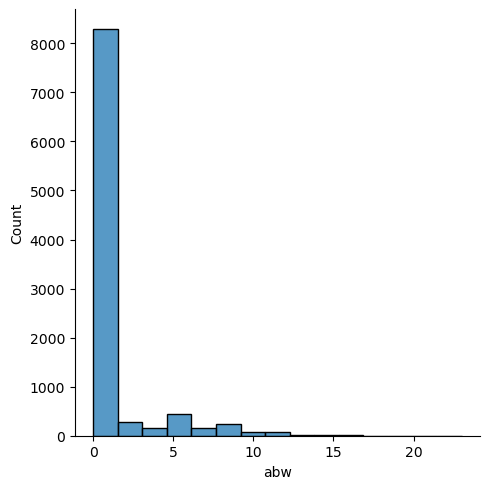

In [557]:
sns.displot(image_df['abw'], kde=False);

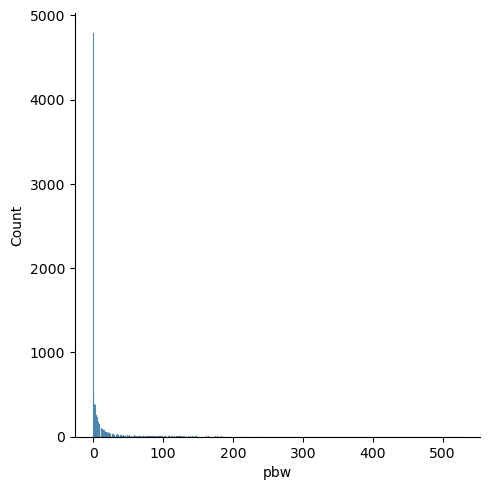

In [558]:
sns.displot(image_df['pbw'], kde=False);

In [562]:
train_df, test_df = train_test_split(image_df, test_size = 0.1, shuffle = True,random_state = 42)

In [563]:
print(train_df.shape)
print(test_df.shape)

(8681, 3)
(965, 3)


In [564]:
import os
import PIL

In [565]:
train_df.head()

,Filepath,abw,pbw
4238,images500-20221123T124124Z-001\images500\id_fa6f4820567c2d5fe1f7dc9c.jpg,0,0
4560,images500-20221123T124124Z-001\images500\id_5cb392aefe19e53639bae37e.jpg,0,6
2464,images500-20221123T124124Z-001\images500\id_d5cb468ebe5ce2b1adc8c8c3.jpg,0,176
9665,images500-20221123T124124Z-001\images500\id_cf4211788c91adf8781be64a.jpg,5,0
1798,images500-20221123T124124Z-001\images500\id_181ecdaf47a68ffe01e4fa03.jpg,0,42


In [566]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(train_df['Filepath'][i]))
plt.show()

In [567]:
train_df.describe()

,abw,pbw
count,8681.000000,8681.000000
mean,0.923166,11.110932
std,2.375027,26.402163
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,8.000000
max,14.000000,198.000000


In [568]:
width,height = 1000,1000

In [569]:
for t in image_df['Filepath']:
    img = PIL.Image.open(t)
    w, h = img.size
    if w < width:
        width = w
    if h < height:
        height = h

IMG_WIDTH = width
IMG_HEIGHT = height
IMG_CHANNELS = 3

In [570]:
IMG_WIDTH

In [571]:
IMG_HEIGHT

In [145]:
def visualize_aug(image_gen,df):
    series = df.iloc[2]
    df_aug_visualize = pd.concat([series,series], axis = 1).transpose()
    iter_viz = image_gen.flow_from_dataframe(
    dataframe = df_aug_visualize,
    x_col = 'Filepath',
    y_col = ['abw','pbw'],
    class_mode = 'raw',
    target_size = (256,256),
    batch_size = 2)
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        batch = next(iter_viz)
        img = batch[0]
        img = img[1,:,:,:]
        plt.imshow(img)
        
    plt.show()
    plt.close()

Found 2 validated image filenames.


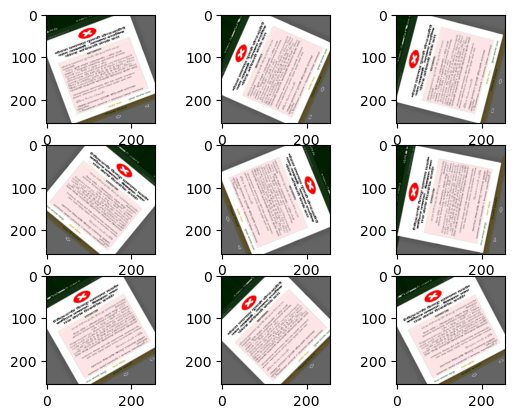

In [463]:
visualize_aug(train_gen,train_df)

In [187]:
#!pip install fastai2

In [573]:
import fastai

In [574]:
fastai.__version__

'2.7.10'

In [575]:
# import vision submodule from fastai
from fastai.vision.all import *

In [576]:
class TitledList(list, ShowTitle):
    _show_args = {'label': 'text'}
    def show(self, ctx=None, **kwargs):
        "Show self"
        return show_title(self, ctx=ctx, **merge(self._show_args, kwargs))

In [577]:
class ToListTensor(DisplayedTransform):
    "Transform to int tensor"
    # order = 10 #Need to run after PIL transforms on the GPU
    _show_args = {'label': 'text'}
    def __init__(self, split_idx=None,):
        super().__init__(split_idx=split_idx)

    def encodes(self, o): return o
    def decodes(self, o): return TitledList(o)

In [578]:
blocks = [ImageBlock, RegressionBlock]

#item_tfms = [Resize(150)];# size should be bigger
batch_tfms = [*aug_transforms(mult=2,do_flip = True,flip_vert=True,
                max_lighting = 0.2, p_affine=0.75, p_lighting=0.7, align_corners = True ,max_rotate = 10.,size=(128)),
              Normalize.from_stats(*imagenet_stats)]
splitter = RandomSplitter(valid_pct=0.15, seed=42)
plant = DataBlock(blocks =blocks,
                  get_x = ColReader('Filepath'),
                  get_y = Pipeline([ColReader(['abw','pbw']),ToListTensor]),
                  splitter =splitter,
                  item_tfms=Resize(500, method = 'Squish'),
                  batch_tfms = batch_tfms,
                  n_inp = 1
                  )
dls = plant.dataloaders(train_df)

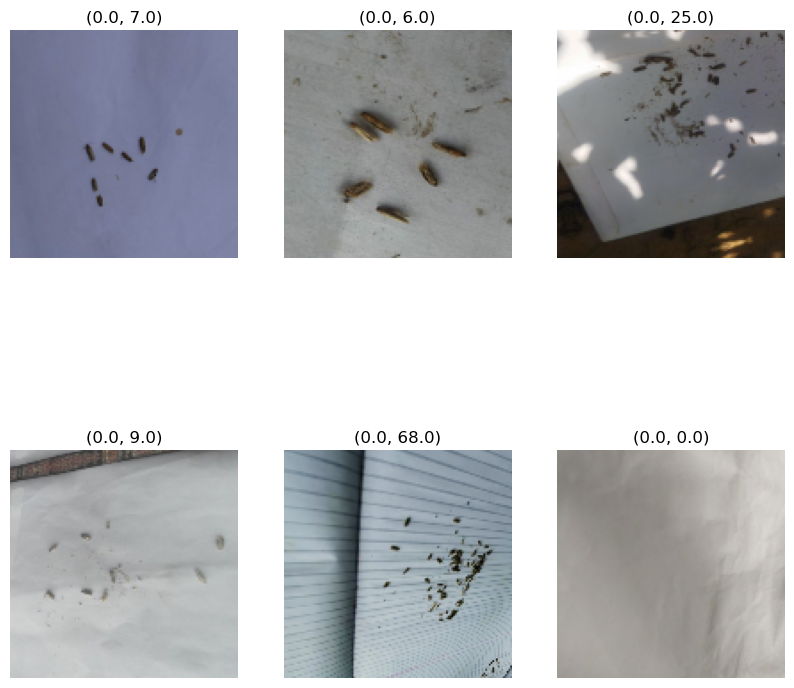

In [579]:
dls.show_batch(nrows=2,ncols=3,figsize=(10,10))

In [580]:
print(plant.summary(train_df))

Setting-up type transforms pipelines
4238  images500-20221123T124124Z-001\images500\id_fa6f4820567c2d5fe1f7dc9c.jpg   
4560  images500-20221123T124124Z-001\images500\id_5cb392aefe19e53639bae37e.jpg   
2464  images500-20221123T124124Z-001\images500\id_d5cb468ebe5ce2b1adc8c8c3.jpg   
9665  images500-20221123T124124Z-001\images500\id_cf4211788c91adf8781be64a.jpg   
1798  images500-20221123T124124Z-001\images500\id_181ecdaf47a68ffe01e4fa03.jpg   
...                                                                        ...   
5789  images500-20221123T124124Z-001\images500\id_b7db5590d95e737d1aca5d3f.jpg   
5241  images500-20221123T124124Z-001\images500\id_c8fbd981a49b808c4aed055d.jpg   
5440  images500-20221123T124124Z-001\images500\id_cc3b280f2ff4dd867e61d5f2.jpg   
864   images500-20221123T124124Z-001\images500\id_0b578a8ca2f8d5a6c3fc0f88.jpg   
7340  images500-20221123T124124Z-001\images500\id_894dd3ea62535e2c07578436.jpg   

      abw  pbw  
4238    0    0  
4560    0    6  
2464    0

In [586]:
model =resnet50

In [587]:
learn = vision_learner(dls, model, metrics=[mae,mse], loss_func=L1LossFlat(),lr=0.0001)

In [588]:
learn.fine_tune(4,freeze_epochs=4)

epoch,train_loss,valid_loss,mae,mse,time
0,6.595339,6.561794,6.561794,433.065613,22:31
1,6.297177,5.887814,5.887814,372.553375,22:06
2,5.162510,4.323917,4.323917,186.133286,22:24
3,4.179816,3.557704,3.557704,128.101852,21:02


epoch,train_loss,valid_loss,mae,mse,time
0,3.802642,3.231498,3.231498,118.402351,29:33
1,3.370403,2.854188,2.854188,100.526566,29:04
2,2.989724,2.577552,2.577552,84.590378,27:52
3,2.891379,2.412356,2.412356,81.411591,29:19


SuggestedLRs(valley=4.365158383734524e-05)

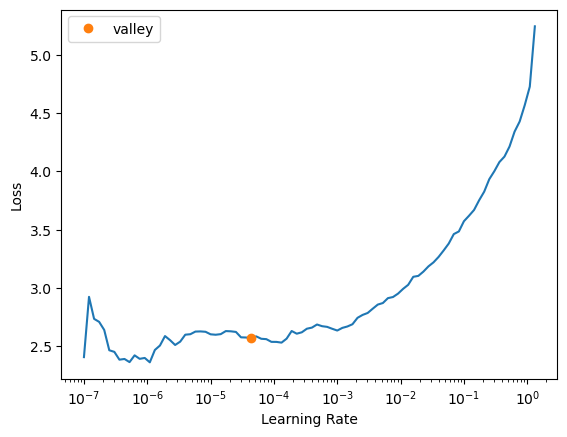

In [223]:
learn.lr_find()

In [589]:
dl = learn.dls.test_dl(testdata['Filepath'])
preds = learn.get_preds(dl=dl)

In [590]:
preds

(TensorBase([[-1.5988e-02,  6.5645e-02],
             [-6.6433e-02,  3.1123e+01],
             [-5.4782e-02,  3.1248e+00],
             ...,
             [-9.8312e-03,  2.5521e+01],
             [ 7.8007e+00,  9.8432e-01],
             [-6.2318e-02,  2.9024e-01]]),
 None)

In [592]:
testdata['abw'], testdata['pbw'] = np.array(preds[0][0:,0]),np.array(preds[0][0:,1])

In [593]:
# np.corrcoef(pbw_pred,test_df['pbw'])

In [594]:
testdata.head()

,Filepath,image_id_worm,abw,pbw
2,images500-20221123T124124Z-001\images500\id_7fd9ccb8d3b480825e5d6fe4.jpg,id_7fd9ccb8d3b480825e5d6fe4.jpg,-0.015988,0.065645
5,images500-20221123T124124Z-001\images500\id_0883bbe2ed47e82b16bca7aa.jpg,id_0883bbe2ed47e82b16bca7aa.jpg,-0.066433,31.123114
6,images500-20221123T124124Z-001\images500\id_3fb316b0bc92f9b64e150c61.jpg,id_3fb316b0bc92f9b64e150c61.jpg,-0.054782,3.124785
12,images500-20221123T124124Z-001\images500\id_43fe6a2c9d27d56e1ce12e35.jpg,id_43fe6a2c9d27d56e1ce12e35.jpg,1.157866,2.450964
17,images500-20221123T124124Z-001\images500\id_62b9746c1d2daf1613ca7cb9.jpg,id_62b9746c1d2daf1613ca7cb9.jpg,0.044240,84.600349


In [595]:
testdata=testdata.drop('Filepath', axis =1)

In [596]:
tt = pd.melt(testdata, id_vars=['image_id_worm'], value_vars=['abw','pbw'])

In [597]:
tt['image_id_worm'] = tt['image_id_worm'].str.split('.', expand=True)[0]

In [598]:
tt['image_id_worm'] = tt['image_id_worm'] + '_' +  tt['variable']

In [599]:
tt = tt.drop('variable',axis = 1)

In [600]:
tt.to_csv('fastsub.csv',index = False)

In [601]:
tt.head()

,image_id_worm,value
0,id_7fd9ccb8d3b480825e5d6fe4_abw,-0.015988
1,id_0883bbe2ed47e82b16bca7aa_abw,-0.066433
2,id_3fb316b0bc92f9b64e150c61_abw,-0.054782
3,id_43fe6a2c9d27d56e1ce12e35_abw,1.157866
4,id_62b9746c1d2daf1613ca7cb9_abw,0.044240
